In [1]:
### final project code for OCEAN 215 south data

In [2]:
### import block 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
from datetime import timedelta
import netCDF4
### imports for graphing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm

In [3]:
### initiating filepath to south data
filepath_south = '~/project-stuff/data/south.p06.csv'

### naming the filepath south_df, and removing headers as well as first row and last row becasue it was not atual data
south_df = (pd.read_csv(filepath_south, skiprows = 6 ,  sep = ',')).iloc[1:-1]

display(south_df)

,EXPOCODE,SECT,STNNBR,CASTNO,SAMPNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,LATITUDE,...,TRITUM_FLAG_W,TRITER,CS-137,CS-137_FLAG_W,CS137ER,PLUTO,PLUTO_FLAG_W,PLUTOER,THETA,SIG0
1,49NZ20030909,P06,127,4.0,0.0,-999.0,9.0,20030912.0,1358,-32.511,...,1.0,-999,1.48,2.0,0.07,-999,1.0,-999,-999,-999
2,49NZ20030909,P06,127,4.0,36.0,12048.0,2.0,20030912.0,1358,-32.511,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,16.9245,25.836
3,49NZ20030909,P06,127,4.0,35.0,12047.0,2.0,20030912.0,1358,-32.511,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,16.9238,25.8353
4,49NZ20030909,P06,127,4.0,34.0,12046.0,2.0,20030912.0,1358,-32.511,...,1.0,-999,1.16,2.0,0.11,-999,1.0,-999,16.8751,25.843
5,49NZ20030909,P06,127,4.0,33.0,12045.0,2.0,20030912.0,1358,-32.511,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,16.7301,25.8739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,49NZ20030909,P06,4,1.0,5.0,12017.0,9.0,20031012.0,806,-32.5003,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,-999,-999
4289,49NZ20030909,P06,4,1.0,4.0,12016.0,9.0,20031012.0,806,-32.5003,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,-999,-999
4290,49NZ20030909,P06,4,1.0,3.0,12012.0,9.0,20031012.0,806,-32.5003,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,-999,-999
4291,49NZ20030909,P06,4,1.0,2.0,12014.0,9.0,20031012.0,806,-32.5003,...,9.0,-999,-999,9.0,-999,-999,9.0,-999,-999,-999


In [4]:
#making variables 

#equator data
# declare these first so that I can round them
south_temp = south_df['CTDTMP'].astype(float)
south_lat = south_df['LATITUDE'].astype(float)
south_lon = south_df['LONGITUDE'].astype(float)

#rounding to nearest .5 values for lat, lon and temp
# not rounding ph because there are already similar values. 
south_df['round_temp']= np.round(south_temp*2)/2
south_df['round_lat'] = np.round(south_lat*2)/2
south_df['round_lon'] = np.round(south_lon*2)/2

# make variables for the new columns created right above and index by correct temp values
south_roundtemp = south_df['round_temp'].loc[south_temp <= 10].astype(float)
south_roundlat = south_df['round_lat'].loc[south_temp <= 10].astype(float)
south_roundlon = south_df['round_lon'].loc[south_temp <= 10].astype(float)

# making variables that are indexed by the non errored temp and also turn into floats
south_depth = south_df['DEPTH'].loc[south_temp <= 10].astype(float)
south_ph = south_df['PH_TOT'].loc[south_temp <= 10].astype(float)
south_temp = south_df['CTDTMP'].loc[south_temp <= 10].astype(float)



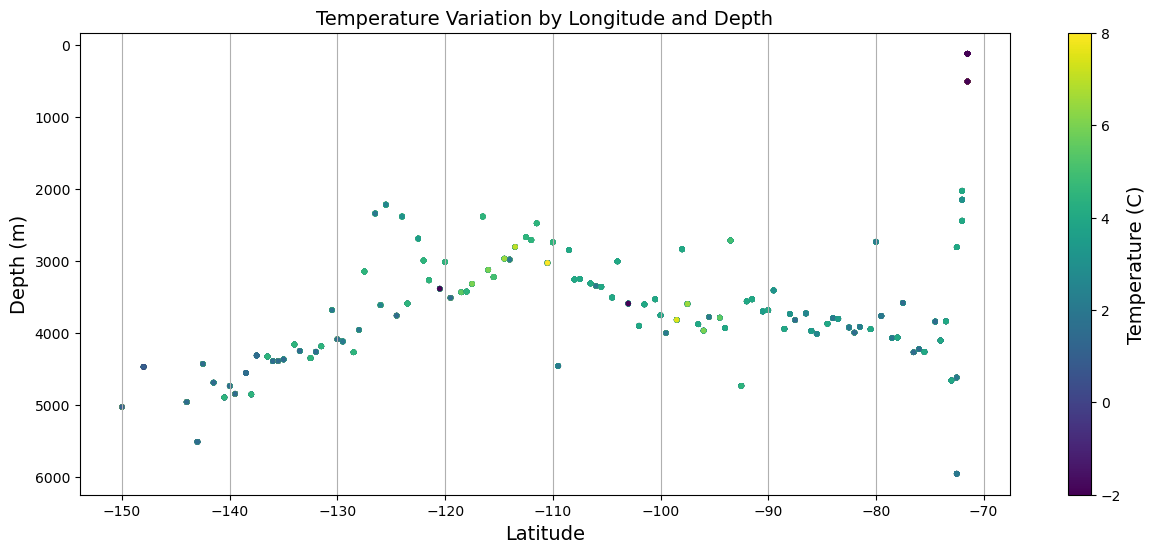

In [5]:
# plotting a graph of temp, depth, and lat
# general figure 
fig, ax = plt.subplots(figsize =(15,6))
sp = ax.scatter(south_roundlon, south_depth, c = south_roundtemp, marker = '.', label = 'Temperature', vmin = -2, vmax =8)

# aestetics of plot
ax.invert_yaxis()
ax.set_ylabel('Depth (m)', fontsize = 14)
ax.set_xlabel('Latitude', fontsize = 14)
plt.title('Temperature Variation by Longitude and Depth', fontsize = 14)              
c1 = plt.colorbar(sp, ax=ax )
c1.set_label('Temperature (C)', fontsize = 14)
ax.grid(axis = 'x')

plt.savefig( 'TEMP 215 graph south')

In [6]:
# subset the already subsetted data by ph this time to delete errored PH values
# use loc wiht boolean condition to get only the values that arent -999 error

south_roundlon = south_roundlon.loc[south_ph != -999]
south_depth = south_depth.loc[south_ph != -999]
south_ph = south_ph.loc[south_ph != -999]

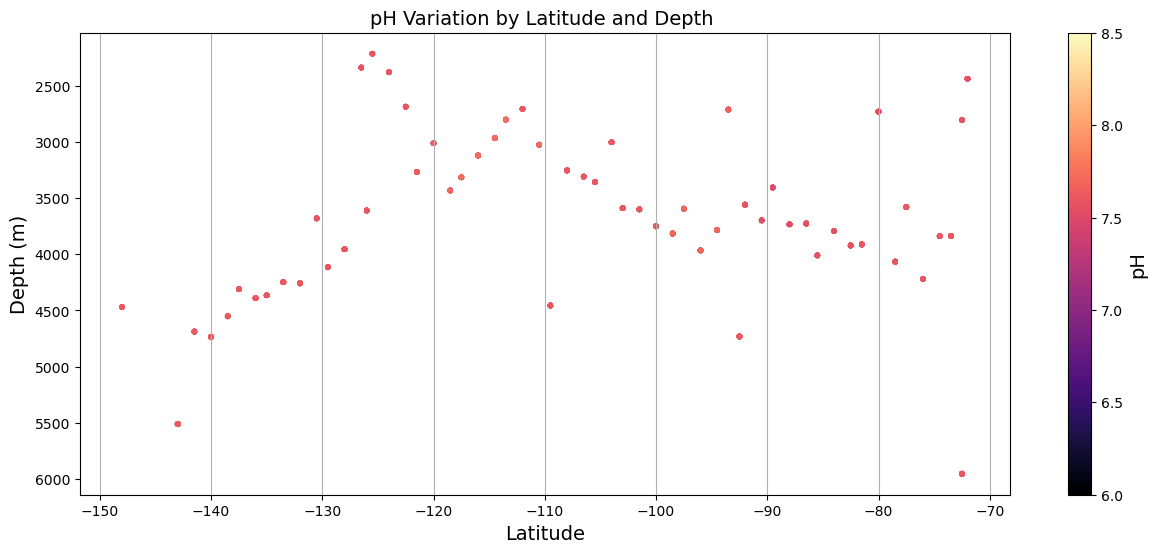

In [7]:
# plotting a graph of pH, depth, and lat.
# general figure 
fig, ax = plt.subplots(figsize =(15,6))
sp2 = ax.scatter(south_roundlon, south_depth, c= south_ph, cmap = 'magma', marker = '.', label = 'pH', vmin=6, vmax = 8.5)

# figure aestetics
ax.invert_yaxis()
ax.set_ylabel('Depth (m)',fontsize = 14)
ax.set_xlabel('Latitude', fontsize = 14)
c2 = plt.colorbar(sp2, ax=ax )
c2.set_label('pH', fontsize = 14)
plt.title('pH Variation by Latitude and Depth ', fontsize = 14)  
ax.grid(axis = 'x')

plt.savefig('pH 215 graph south')